In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../music_genre_dataset.csv", sep=',')
df_ = df.drop('Жанр', axis=1)
df_

,BPM,RMS Energy,Zero-Crossing Rate
0,107,0.667570,0.273374
1,91,0.206187,0.118396
2,72,0.239163,0.070668
3,118,0.448361,0.107527
4,100,0.739468,0.195543
...,...,...,...
195,141,0.699088,0.276072
196,72,0.236141,0.103938
197,123,0.573758,0.293730
198,122,0.217458,0.173312


In [3]:
df_.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BPM                 200 non-null    int64  
 1   RMS Energy          200 non-null    float64
 2   Zero-Crossing Rate  200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [4]:
df_.describe()

,BPM,RMS Energy,Zero-Crossing Rate
count,200.000000,200.000000,200.000000
mean,111.120000,0.380726,0.149216
std,22.118811,0.187552,0.060528
min,71.000000,0.106610,0.051530
25%,94.000000,0.233415,0.106686
50%,109.000000,0.319341,0.132053
75%,128.000000,0.519124,0.186985
max,159.000000,0.797820,0.299186


In [5]:
X = df[['BPM', 'RMS Energy']]
Y = df['Zero-Crossing Rate']

# Добавляем константу в матрицу признаков
X = sm.add_constant(X)

# Строим модель
model_sm = sm.OLS(Y, X).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     Zero-Crossing Rate   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     77.86
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.21e-25
Time:                        14:11:22   Log-Likelihood:                 335.89
No. Observations:                 200   AIC:                            -665.8
Df Residuals:                     197   BIC:                            -655.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.017      1.900      0.0

In [6]:

# Построение модели с sklearn
model_sk = LinearRegression()
model_sk.fit(X, Y)

# Коэффициенты
print("Intercept:", model_sk.intercept_)
print("Coefficients:", model_sk.coef_)


Intercept: 0.03216947906516615
Coefficients: [0.         0.000437   0.17988613]


In [7]:

# Предсказание
y_pred = model_sk.predict(X)

# Расчёт метрик качества
r2 = r2_score(Y, y_pred)
mse = mean_squared_error(Y, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.44149749454500364
MSE: 0.002035953549456323


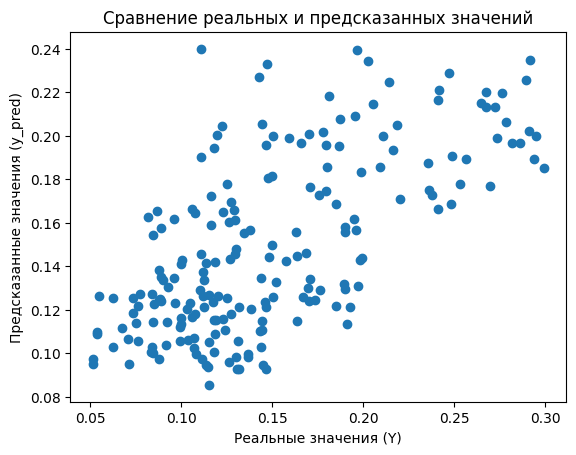

In [8]:
plt.scatter(Y, y_pred)
plt.xlabel("Реальные значения (Y)")
plt.ylabel("Предсказанные значения (y_pred)")
plt.title("Сравнение реальных и предсказанных значений")
plt.show()


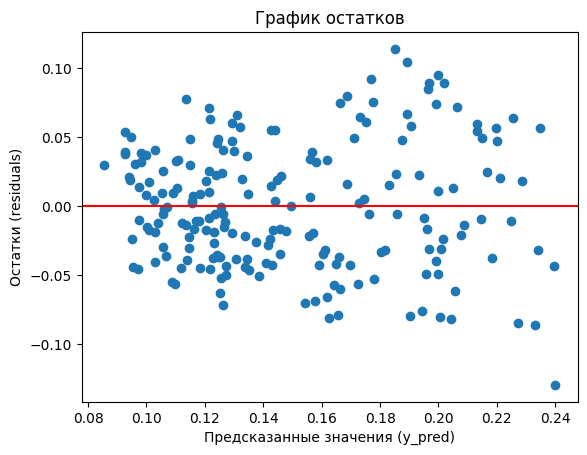

In [9]:
# График остатков:
residuals = Y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Предсказанные значения (y_pred)")
plt.ylabel("Остатки (residuals)")
plt.title("График остатков")
plt.axhline(y=0, color='red')
plt.show()